In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [98]:
(X_train, y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [100]:
len(X_train)

60000

In [102]:
len(X_test)

10000

In [104]:
X_train[0].shape

(28, 28)

In [106]:
#2d matrix
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

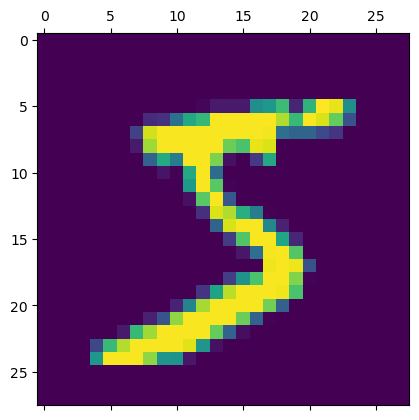

In [108]:
plt.matshow(X_train[0])
plt.show()

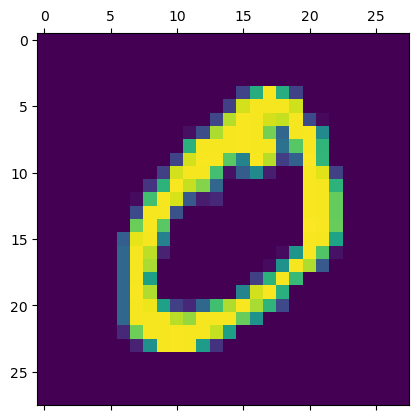

In [110]:
plt.matshow(X_train[1])
plt.show()

In [111]:
y_train[2]


4

In [114]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [116]:
X_train.shape

(60000, 28, 28)

In [118]:
#dividing by 255 for sampling to normalising range to 0 to 1
X_train=X_train/255
X_test=X_test/255

In [120]:
#Flatten it

X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [122]:
#single dimension array before was 2d
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [128]:
#creating a simple neural network

model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 907us/step - accuracy: 0.8783 - loss: 0.4680
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 949us/step - accuracy: 0.9151 - loss: 0.3042
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - accuracy: 0.9209 - loss: 0.2835
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 907us/step - accuracy: 0.9238 - loss: 0.2732
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 916us/step - accuracy: 0.9256 - loss: 0.2663


In [ ]:
#accuracy was low 0.31 to improve accuracy we scale the data  in 21 we divide by 255 x_train and test 

In [149]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.9257 - loss: 0.2665


[0.2664739787578583, 0.9257000088691711]

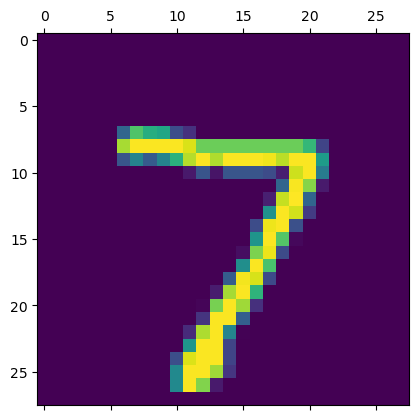

In [163]:
plt.matshow(X_test[0])
plt.show()

In [167]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step


array([2.60745436e-02, 3.81902169e-07, 7.39352554e-02, 9.55470979e-01,
       2.76667858e-03, 1.13702655e-01, 2.84871294e-06, 9.99813974e-01,
       1.24707006e-01, 7.23998427e-01], dtype=float32)

In [183]:
np.argmax(y_predicted[0])

7

In [187]:
y_predicted_labels=[np.argmax(i)for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [193]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   6,    7,  926,   15,    7,    3,   11,    9,   44,    4],
       [   4,    0,   22,  916,    1,   25,    2,    8,   22,   10],
       [   2,    1,    4,    1,  914,    0,    9,    4,    8,   39],
       [  10,    3,    6,   31,   12,  776,   13,    4,   31,    6],
       [  13,    3,    9,    1,    7,   12,  909,    2,    2,    0],
       [   2,    6,   24,    8,   10,    0,    0,  936,    2,   40],
       [   7,    6,    7,   20,    9,   26,    8,    9,  875,    7],
       [  11,    7,    1,   11,   23,    6,    0,   12,    8,  930]])>

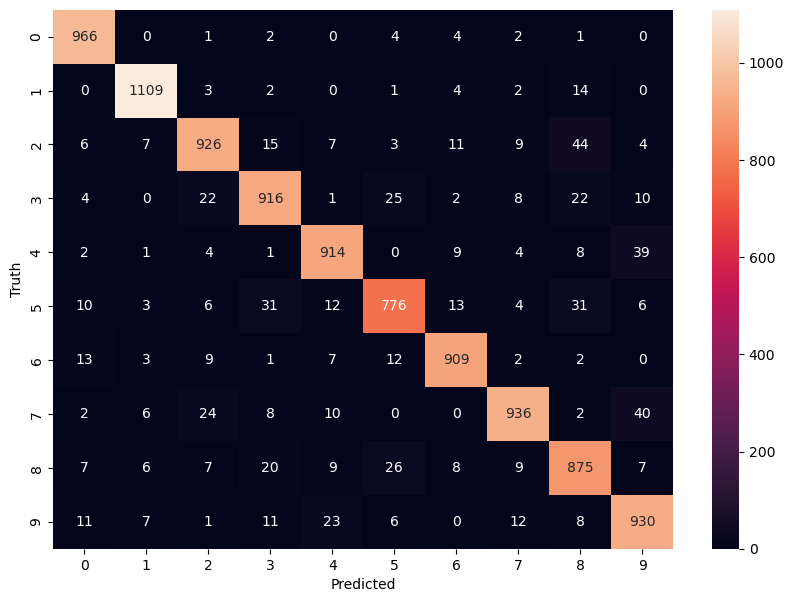

In [201]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
#44 times  truth was 40 and it predicted 8

In [230]:
#creating a simple neural network with one hidden layer

model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

D:\Abhishek\demon\Apps\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9245 - loss: 0.2670
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9634 - loss: 0.1239
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9736 - loss: 0.0863
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9798 - loss: 0.0660
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9836 - loss: 0.0534


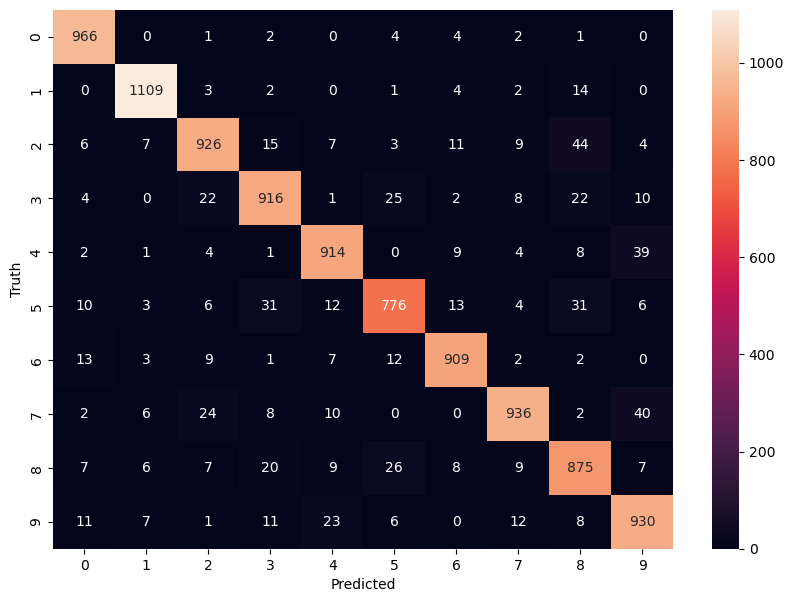

In [232]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [226]:
#creating a simple neural network

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9214 - loss: 0.2766
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9633 - loss: 0.1248
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9738 - loss: 0.0881
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9802 - loss: 0.0660
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9842 - loss: 0.0522


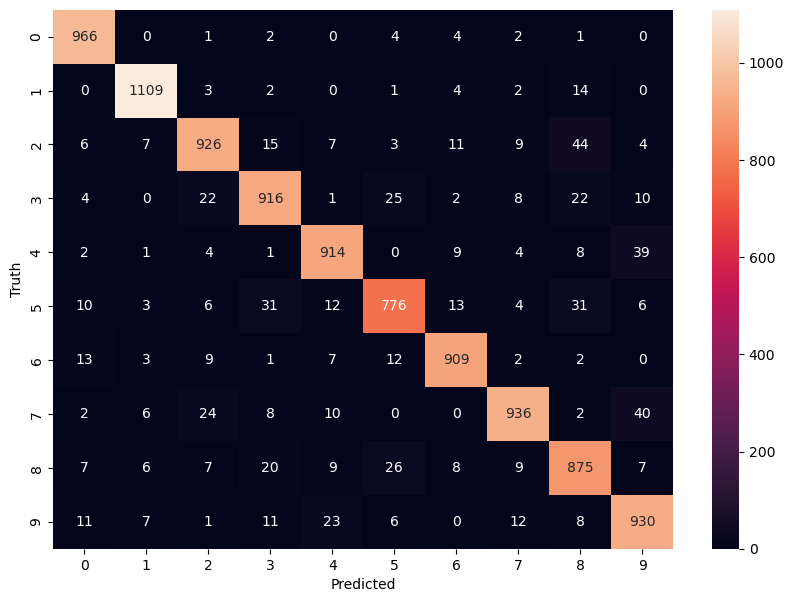

In [228]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()